In [157]:
from micecat import *

icat = 0
df0 = get_micecat_df(icat, return_full=True)

icat = 15
df = get_micecat_df(icat, return_full=True)
dfc = df[df['flag_central']==0]
dfs = df[df['flag_central']==1]

df.head()

MICECAT field 0, 0 < ra < 2, 0 < dec < 2
MICECAT field 15, 30 < ra < 32, 0 < dec < 2


,unique_halo_id,flag_central,nsats,ra_gal,dec_gal,z_cgal,lmhalo,lmstellar,lsfr,euclid_nisp_y_true,euclid_nisp_j_true,euclid_nisp_h_true,I,H,x,y,M_I,M_H
17,105769514,0,0,30.847807,1.070363,1.21108,11.8361,9.704,0.665,22.547048,22.464048,22.347048,22.547048,22.403973,434.515029,548.972400,-21.264381,-21.407456
39,104024691,1,22,31.396451,1.124796,1.03955,13.5317,9.800,1.388,23.476673,23.108673,22.631673,23.476673,22.844185,716.674800,576.966514,-20.013271,-20.645758
94,58758816,0,0,31.205311,0.287717,0.66125,11.5721,9.427,0.716,21.850065,21.776065,21.676065,21.850065,21.724914,618.374229,146.468743,-20.657399,-20.782550
95,55753934,0,1,30.296206,0.303244,0.51417,11.4648,9.169,0.876,21.642547,21.574547,21.484547,21.642547,21.528615,150.834514,154.454057,-20.305407,-20.419339
97,306570590,0,1,30.797569,0.150471,0.34092,10.5616,8.105,-0.714,24.306952,24.061952,23.909952,24.306952,23.983294,408.678343,75.885086,-16.718410,-17.042067


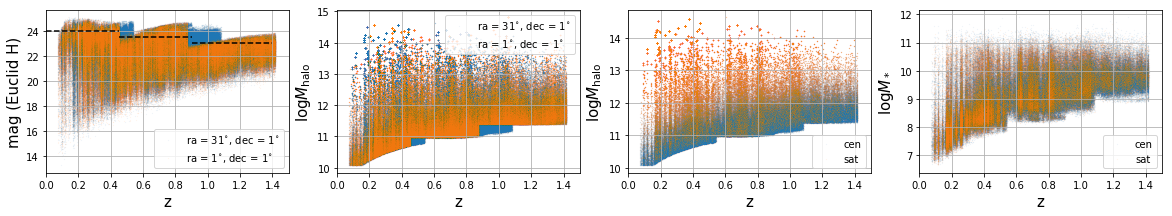

In [39]:
fig, ax = plt.subplots(1,4, figsize=(20,3))

ax[0].scatter(df['z_cgal'], df['euclid_nisp_h_true'],s=0.0005, 
            label='ra = %d$^{\circ}$, dec = %d$^{\circ}$'\
            %(round(np.median(df['ra_gal'])), round(np.median(df['dec_gal']))))
ax[0].scatter(df0['z_cgal'], df0['euclid_nisp_h_true'],s=0.0005,
            label='ra = %d$^{\circ}$, dec = %d$^{\circ}$'\
            %(round(np.median(df0['ra_gal'])), round(np.median(df0['dec_gal']))))
ax[0].plot([0,0.45],[24,24],'k--')
ax[0].plot([0.45,0.9],[23.5,23.5],'k--')
ax[0].plot([0.9,1.4],[23,23],'k--')
ax[0].set_xlabel('z',fontsize=15)
ax[0].set_ylabel('mag (Euclid H)',fontsize=15)
ax[0].grid()
ax[0].set_xlim([0,1.5])
ax[0].legend()

ax[1].scatter(df['z_cgal'], df['lmhalo'],s=0.0005, 
            label='ra = %d$^{\circ}$, dec = %d$^{\circ}$'\
            %(round(np.median(df['ra_gal'])), round(np.median(df['dec_gal']))))
ax[1].scatter(df0['z_cgal'], df0['lmhalo'],s=0.0005,
            label='ra = %d$^{\circ}$, dec = %d$^{\circ}$'\
            %(round(np.median(df0['ra_gal'])), round(np.median(df0['dec_gal']))))
ax[1].set_xlabel('z',fontsize=15)
ax[1].set_ylabel(r'log$M_{\rm halo}$',fontsize=15)
ax[1].grid()
ax[1].set_xlim([0,1.5])
ax[1].legend(fontsize=10)

ax[2].scatter(dfc['z_cgal'],dfc['lmhalo'],s=0.0005, label='cen')
ax[2].scatter(dfs['z_cgal'],dfs['lmhalo'],s=0.0005, label='sat')
ax[2].set_xlabel('z',fontsize=15)
ax[2].set_ylabel(r'log$M_{\rm halo}$',fontsize=15)
ax[2].grid()
ax[2].set_xlim([0,1.5])
ax[2].legend(fontsize=10)

ax[3].scatter(dfc['z_cgal'],dfc['lmstellar'],s=0.0005, label='cen')
ax[3].scatter(dfs['z_cgal'],dfs['lmstellar'],s=0.0005, label='sat')
ax[3].set_xlabel('z',fontsize=15)
ax[3].set_ylabel(r'log$M_*$',fontsize=15)
ax[3].grid()
ax[3].set_xlim([0,1.5])
ax[3].legend(fontsize=10)

In [86]:
from Helgason import *
euclid_bands_dict = {'y':(0.920,1.146), 'j':(1.146,1.372),'h':(1.372,2.000)}

mbinedges = np.arange(12,28,0.2)
mbins = (mbinedges[1:] + mbinedges[:-1])/2

euclid_band = 'y'
bandwl = np.mean(euclid_bands_dict[euclid_band])
bandnu = bandwl * u.um.to(u.Hz, equivalencies=u.spectral())
bandname = 'euclid_nisp_'+euclid_band+'_true'
dN_dm_ddeg2c = np.histogram(dfc[bandname], bins=mbinedges)[0] / np.diff(mbinedges) / 4
dN_dm_ddeg2s = np.histogram(dfs[bandname], bins=mbinedges)[0] / np.diff(mbinedges) / 4
dN_dm_ddeg2h = [Helgason_model().dN_dsr(bandwl,m_min=m_min,m_max=m_max) \
                for m_min, m_max in zip(mbinedges[:-1],mbinedges[1:])]
dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) / np.diff(mbinedges) / (u.sr).to(u.deg**2)

nuFnu = bandnu*(3631*10**(-mbins/2.5)) * (u.Hz*u.Jy).to(u.nW/u.m**2)
dnuInu_dmc = dN_dm_ddeg2c * nuFnu / ((u.deg**2).to(u.sr))
dnuInu_dms = dN_dm_ddeg2s * nuFnu / ((u.deg**2).to(u.sr))
dnuInu_dmh = dN_dm_ddeg2h * nuFnu / ((u.deg**2).to(u.sr))

nuInu_cumc = np.cumsum(dnuInu_dmc*np.diff(mbinedges))
nuInu_cums = np.cumsum(dnuInu_dms*np.diff(mbinedges))
nuInu_cumh = np.cumsum(dnuInu_dmh*np.diff(mbinedges))

Text(0, 0.5, '$\\nu I_\\nu$(<m) [nW/m$^2$/sr]')

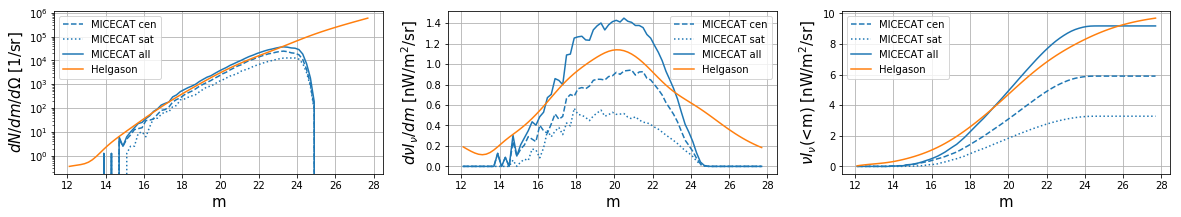

In [87]:
fig, ax = plt.subplots(1,3,figsize=(20,3))
ax[0].semilogy(mbins, dN_dm_ddeg2c,'C0--',label='MICECAT cen')
ax[0].plot(mbins, dN_dm_ddeg2s,'C0:',label='MICECAT sat')
ax[0].plot(mbins, dN_dm_ddeg2c+dN_dm_ddeg2s,'C0',label='MICECAT all')
ax[0].plot(mbins, dN_dm_ddeg2h,'C1',label='Helgason')
# ax[0].set_ylim([1e1,1e5])
ax[0].grid()
ax[0].legend(fontsize=10)
ax[0].set_xlabel('m',fontsize=15)
ax[0].set_ylabel(r'$dN/dm/d\Omega$ [1/sr]',fontsize=15)

ax[1].plot(mbins, dnuInu_dmc,'C0--',label='MICECAT cen')
ax[1].plot(mbins, dnuInu_dms,'C0:',label='MICECAT sat')
ax[1].plot(mbins, dnuInu_dmc+dnuInu_dms,'C0',label='MICECAT all')
ax[1].plot(mbins, dnuInu_dmh,'C1',label='Helgason')
# ax[1].set_ylim([0,1.5])
ax[1].grid()
ax[1].legend(fontsize=10)
ax[1].set_xlabel('m',fontsize=15)
ax[1].set_ylabel(r'$d\nu I_\nu/dm$ [nW/m$^2$/sr]',fontsize=15)

ax[2].plot(mbins, nuInu_cumc,'C0--',label='MICECAT cen')
ax[2].plot(mbins, nuInu_cums,'C0:',label='MICECAT sat')
ax[2].plot(mbins, nuInu_cumc+nuInu_cums,'C0',label='MICECAT all')
ax[2].plot(mbins, nuInu_cumh,'C1',label='Helgason')
# ax[2].set_ylim([0,1.5])
ax[2].grid()
ax[2].legend(fontsize=10)
ax[2].set_xlabel('m',fontsize=15)
ax[2].set_ylabel(r'$\nu I_\nu$(<m) [nW/m$^2$/sr]',fontsize=15)

***

# HST CANDLES images

### CANDLES galaxy catalog
“CANDELS Multi-wavelength Catalogs: Source Identification and Photometry in the CANDELS COSMOS Survey Field”

https://ui.adsabs.harvard.edu/abs/2017ApJS..228....7N

Catalog access: 
https://cdsarc.unistra.fr/viz-bin/cat?J/ApJS/228/7


In [1]:
import gzip

loaddir = 'HSTimages/J_ApJS_228_7/'
with open(loaddir + 'ReadMe', "r") as f:
    lines = f.read()
    lines = lines.strip().split("\n")
    
headers9 = []
for i in range(129,251):
    words = lines[i].strip().split()
    if '-' not in words[0]:
        continue
    headers9.append(words[4])
headers9[-1] = words[3]

headers10 = []
for i in range(269,303):
    words = lines[i].strip().split()
    if '-' not in words[0]:
        continue
    if words[0][-1]=='-':
        headers10.append(words[4])
    else:
        headers10.append(words[3])
    
headers11 = []
for i in range(333,388):
    words = lines[i].strip().split()
    if '-' not in words[0]:
        continue
    if 'Msun' in words[2]:
        headers11.append(words[3])
    else:
        headers11.append(words[4])
        
df9_0 = pd.read_csv(loaddir+'table9.dat.gz',delim_whitespace=True, names=headers9)
df10_0 = pd.read_csv(loaddir+'table10.dat.gz', delim_whitespace=True, names=headers10)
df11_0 = pd.read_csv(loaddir+'table11.dat.gz', delim_whitespace=True, names=headers11)

In [55]:
from utils import *
from astropy.coordinates import SkyCoord

# select sources with z < 0.5 and M*>1e11
sp = np.where((df11_0['zphot']>0) & (df11_0['zphot']<0.5) \
              & (df11_0['Mass']>11) & (df11_0['zphotu68']<0.5))[0]
df9, df10, df11 = df9_0.iloc[sp], df10_0.iloc[sp], df11_0.iloc[sp]

df = df9[['RAdeg','DEdeg']].copy()
df[['zbest','zspec','zphot','zphotl68','zphotu68','Mass']] \
= df11[['zbest','zspec','zphot','zphotl68','zphotu68','Mass']]

df['deg_kpc'] = cosmo.arcsec_per_kpc_proper(df['zbest']).to(u.deg/u.kpc).value
df['SkyCoord'] = SkyCoord(df['RAdeg'], df['DEdeg'], frame='icrs', unit='deg').to_string('hmsdms')

In [56]:
df

,RAdeg,DEdeg,zbest,zspec,zphot,zphotl68,zphotu68,Mass,deg_kpc,SkyCoord
1469,150.142307,2.190654,0.3577,-99.0000,0.358,0.34,0.40,11.1,0.000054,10h00m34.1537s +02d11m26.3544s
2754,150.090706,2.205656,0.4176,-99.0000,0.418,0.39,0.46,11.2,0.000049,10h00m21.7694s +02d12m20.3616s
10561,150.096144,2.298564,0.3890,-99.0000,0.389,0.35,0.41,11.1,0.000051,10h00m23.0746s +02d17m54.8304s
10960,150.095097,2.300495,0.3610,0.3601,0.373,0.35,0.40,11.2,0.000053,10h00m22.8233s +02d18m01.782s
15872,150.113809,2.360722,0.2400,-99.0000,0.240,0.17,0.41,11.1,0.000071,10h00m27.3142s +02d21m38.5992s
17469,150.058065,2.380421,0.3470,0.3460,0.350,0.33,0.38,11.1,0.000055,10h00m13.9356s +02d22m49.5156s
18296,150.080651,2.390262,0.3531,0.3521,0.429,0.34,0.47,11.2,0.000054,10h00m19.3562s +02d23m24.9432s
19215,150.105686,2.399109,0.2540,-99.0000,0.254,0.21,0.42,11.1,0.000068,10h00m25.3646s +02d23m56.7924s


In [74]:
# write the reg file to put circle on FITS images (with DS9)
with open('HSTimages/regions.reg','w') as f:
    for (ra,dec,deg_kpc) in zip(df['RAdeg'],df['DEdeg'],df['deg_kpc']):
        for r in [10,15,20,30,50,90]:
            if r<=30:
                c = 'cyan'
            if r==50:
                c = 'red'
            if r==90:
                c = 'green'
            f.write("j2000; circle {} {} {} # width=2 color={}\n".format(ra,dec,deg_kpc*r,c))

***

Text(0.5, 0.98, 'distance to the nearest neighbor in the same halo')

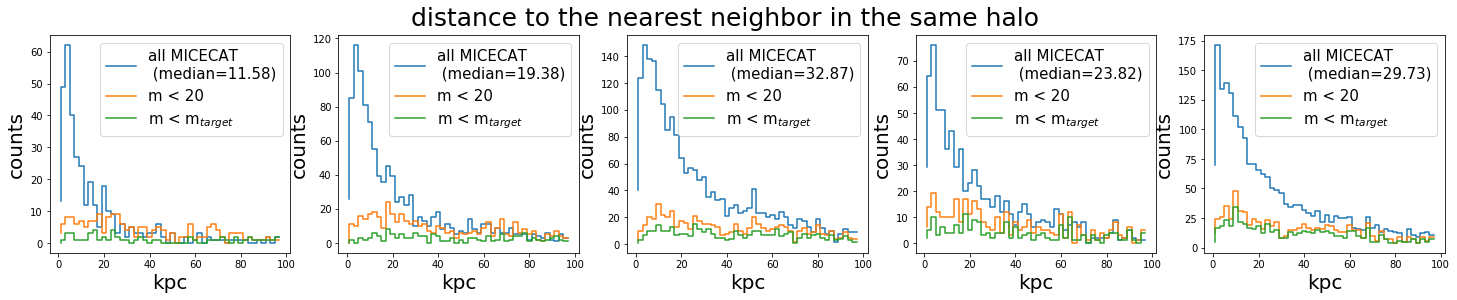

In [334]:
from micecat import *

# df = get_micecat_df(0, add_Rvir=True)

fig, ax = plt.subplots(1, 5, figsize = (25,4))
for ii,(im,M_min,M_max) in enumerate(zip([1,2,3,2,3],[-23,-23,-23,-22,-22],[-22,-22,-22,-21,-21])):
    m_min, m_max = magbindict['m_min'][im], magbindict['m_max'][im]    
    dfi = df.loc[(df['I']>=m_min) & (df['I']<m_max) \
                   & (df['M_I']>=M_min) & (df['M_I']<M_max) & (df['lmhalo']<14)].copy()
    dfi['kpc_per_pix'] = cosmo.kpc_proper_per_arcmin(dfi['z_cgal']).value*7/60
    galids = np.array(dfi.index)
    haloids = dfi['unique_halo_id'].values
    
    ds = []
    dsm = []
    dsb = []
    for i in np.random.permutation(len(dfi)):
        haloid, galid = haloids[i], galids[i]
        x0, y0, I0, kpp = dfi[['x','y','I','kpc_per_pix']].loc[dfi.index==galid].values[0]
        df1hi = df[(df['unique_halo_id']==haloid) & (df.index!=galid)].copy()
        if len(df1hi)==0:
            continue
        dxs = np.array(df1hi[['x']] - x0).flatten()
        dys = np.array(df1hi[['y']] - y0).flatten()
        ds.append(min(np.sqrt(dxs**2 + dys**2))*kpp)
        
        df1hi = df1hi[(df1hi['I']<20)].copy()
        if len(df1hi)==0:
            continue
        dxs = np.array(df1hi[['x']] - x0).flatten()
        dys = np.array(df1hi[['y']] - y0).flatten()
        dsm.append(min(np.sqrt(dxs**2 + dys**2))*kpp)

        df1hi = df1hi[(df1hi['I']<I0)].copy()
        if len(df1hi)==0:
            continue
        dxs = np.array(df1hi[['x']] - x0).flatten()
        dys = np.array(df1hi[['y']] - y0).flatten()
        dsb.append(min(np.sqrt(dxs**2 + dys**2))*kpp)

    ds, dsm, dsb = np.array(ds), np.array(dsm), np.array(dsb)
    
    dbinedges = np.arange(0,100,2)
    dbins = (dbinedges[1:]+dbinedges[:-1])/2
    h = np.histogram(ds, bins=dbinedges)[0]
    hm = np.histogram(dsm, bins=dbinedges)[0]
    hb = np.histogram(dsb, bins=dbinedges)[0]
    ax[ii].step(dbins,h, label='all MICECAT \n (median=%.2f)'%(np.median(ds)))
    ax[ii].step(dbins,hm, label='m < 20')
    ax[ii].step(dbins,hb, label='m < m$_{target}$')
    ax[ii].set_ylabel('counts', fontsize=20)
    ax[ii].set_xlabel('kpc', fontsize=20)
    ax[ii].legend(fontsize=15)
fig.suptitle('distance to the nearest neighbor in the same halo',fontsize=25)

In [ ]:
from run_fit import *

fig, ax = plt.subplots(1,3,figsize=(32,6))
for ir, rcut in enumerate([10,20,30]):
    weighted_avg1,weighted_var1,weighted_varh1,weighted_varl1 = 0,0,0,0
    weighted_avg2,weighted_var2,weighted_varh2,weighted_varl2 = 0,0,0,0
    print('======= %d < r < 100 ======='%rcut)
    sp = np.where((r_arr > rcut) & (r_arr<100))[0]
    
    # Purcell
    data = np.loadtxt('Illustris_frac/Purcell08_med.txt', delimiter=',')
    data_h = np.loadtxt('Illustris_frac/Purcell08_68high.txt', delimiter=',')
    data_l = np.loadtxt('Illustris_frac/Purcell08_68low.txt', delimiter=',')
    ax[ir].fill_between(10**data[:,0],
                     10**np.interp(data[:,0],data_l[:,0],data_l[:,1]),
                     10**np.interp(data[:,0],data_h[:,0],data_h[:,1]),
                             facecolor='g', alpha=0.15, label=r'Purcell et al. 2007, 2008 ($z=0$)')
    data_h = np.loadtxt('Illustris_frac/Purcell08_95high.txt', delimiter=',')
    data_l = np.loadtxt('Illustris_frac/Purcell08_95low.txt', delimiter=',')
    ax[ir].fill_between(10**data[:,0],
                     10**np.interp(data[:,0],data_l[:,0],data_l[:,1]),
                     10**np.interp(data[:,0],data_h[:,0],data_h[:,1]),
                             facecolor='g', alpha=0.1)

    # MW, M31
    ax[ir].errorbar([1e12], [0.02], xerr=[1e12*0.1], yerr=[0],
                 lw=3, color='C4', label='MW')
    ax[ir].errorbar([1.3e12], [0.04], xerr=[1.3e12*0.1], yerr=[0],
                 lw=3, color='C5', label='M31')
    ax[ir].arrow(1e12, 0.02, 0, -0.02*0.4, width=0.5e11, length_includes_head=True, color='C4', 
             head_width=1.5e11, head_length=0.02*0.2, overhang=0)
    ax[ir].arrow(1.3e12, 0.04, 0, -0.04*0.4, width=0.5e11*1.3, length_includes_head=True, color='C5', 
             head_width=1.5e11*1.3, head_length=0.04*0.2, overhang=0)

    # Gonzalez
    Mh_arr,f_arr,f_low_arr, f_high_arr,z_arr = [],[],[],[],[]
    for name,arr in Gonzalez_dict.items():
        z_arr.append(arr[0])
        Mh_arr.append(10**arr[1])
        L_BCGICL_L_tot = arr[5]
        L_ICL_L_BCGICL = 10**(-(arr[10] - arr[7])/2.5)
        f_arr.append(L_BCGICL_L_tot*L_ICL_L_BCGICL)

        L_BCGICL_L_tot = arr[5] - arr[6]
        L_ICL_L_BCGICL = 10**(-((arr[10]+arr[11]+arr[12]) - arr[7])/2.5)
        f_low_arr.append(L_BCGICL_L_tot*L_ICL_L_BCGICL)

        L_BCGICL_L_tot = arr[5] + arr[6]
        L_ICL_L_BCGICL = 10**(-((arr[10]-arr[11]-arr[13]) - arr[7])/2.5)
        f_high_arr.append(L_BCGICL_L_tot*L_ICL_L_BCGICL)

    f_arr,f_low_arr, f_high_arr = np.array(f_arr),np.array(f_low_arr), np.array(f_high_arr)
    ax[ir].errorbar(Mh_arr, f_arr, yerr=[f_arr - f_low_arr,f_high_arr - f_arr], 
                                fmt='.',capsize=3, mfc=None, markersize=10, color='k',
                label='Gonzalez et al. 2005, 2007 '+r'($z\sim %.2f$)'%(np.median(z_arr)))
    # Burke
    ax[ir].errorbar(Burke_dict['M200'], Burke_dict['f_ICL'], yerr=Burke_dict['f_ICL_err'], 
                    fmt='.',capsize=3, mfc=None, markersize=10, color='k', alpha=0.3,
                 label='Burke et al. 2015 '+r'($z\sim %.2f$)'%(np.median(Burke_dict['z'])))


    r_arr = data_dict['rbins']
    Mh_z16 = lambda Ms: (10**12.10) * (Ms/10**10.31)**0.33 \
    * np.exp((Ms/10**10.31)**0.42/(1+(Ms/10)**-1.21) - 0.5)
    for i,(fmt,mfc,name) in enumerate(zip(['v','s','^','v','s'],[None, None, None, 'none', 'none'],
                                            ['high-M/low-z','high-M/med-z','high-M/high-z',
                                             'low-M/low-z','low-M/med-z'])):
        im,m_min, m_max = srcinfo[i]['im'],srcinfo[i]['m_min'],srcinfo[i]['m_max']
        M_min, M_max = srcinfo[i]['M_min'],srcinfo[i]['M_max']    

    #     Mh = 10**np.median(srcinfo[i]['logMh'])
    #     Mh_low = 10**np.percentile(srcinfo[i]['logMh'], 16)
    #     Mh_high = 10**np.percentile(srcinfo[i]['logMh'], 84)
        Mstr = np.median(srcinfo[i]['logMstr'])
        Mstr_low = np.percentile(srcinfo[i]['logMstr'],16)
        Mstr_high = np.percentile(srcinfo[i]['logMstr'],84)
        Mh, Mh_low, Mh_high = Mh_z16(10**Mstr), Mh_z16(10**Mstr_low), Mh_z16(10**Mstr_high)

        for inst in [1,2]:

            Re2 = srcinfo[i]['Re2_'+str(inst)] 
            Re2_low =srcinfo[i]['Re2_low_'+str(inst)]
            Re2_high = srcinfo[i]['Re2_high_'+str(inst)]

            rkpc_arr = np.logspace(-1,3,100)
            sp = np.where((rkpc_arr > rcut))[0]

            galprofdat = gal_profile_model().Wang19_profile(rkpc_arr, im, Re2=Re2)
            p = galprofdat['I_arr']

            galprofdat = gal_profile_model().Wang19_profile(rkpc_arr, im, Re2=Re2_high)
            p_high = galprofdat['I_arr']

            galprofdat = gal_profile_model().Wang19_profile(rkpc_arr, im, Re2=Re2_low)
            p_low = galprofdat['I_arr']

            fext = np.sum(p[sp]*rkpc_arr[sp]**2)/np.sum(p*rkpc_arr**2)
            fext_low = np.sum(p_low[sp]*rkpc_arr[sp]**2)/np.sum(p_low*rkpc_arr**2)
            fext_high = np.sum(p_high[sp]*rkpc_arr[sp]**2)/np.sum(p_high*rkpc_arr**2)

            Lgal = np.sum(data_dict[inst][i]['profgal_arr']*r_arr**2)
            Lgal_low = np.sum(data_dict[inst][i]['profgal_arr_low']*r_arr**2)
            Lgal_high = np.sum(data_dict[inst][i]['profgal_arr_high']*r_arr**2)
            L1h = np.sum(data_dict[inst][i]['prof1h']*r_arr**2)
            L1h_low = np.sum(data_dict[inst][i]['prof1h_low']*r_arr**2)
            L1h_high = np.sum(data_dict[inst][i]['prof1h_high']*r_arr**2)

            Neff = Neff1_all[i] if inst==1 else Neff2_all[i]
            f = fext / (1 + L1h/Lgal/Neff)
            f_low = fext_low / (1 + L1h_high/Lgal_low/Neff)
            f_high = fext_high / (1 + L1h_low/Lgal_high/Neff)
            sig = (f_high - f_low) / 2
            if inst == 1:
                ax[ir].errorbar([Mh*1.01], [f], xerr=[[Mh-Mh_low],[Mh_high-Mh]],
                               yerr=[[f - f_low],[f_high - f]], alpha=0.8,
                                fmt=fmt,capsize=0, mfc=mfc, markersize=10, c='b', 
                            label = name + r' ($z\sim %.2f$)'%np.median(srcinfo[i]['z']))
                weighted_avg1 += f / sig**2
                weighted_var1 += 1 / sig**2
                weighted_varh1 += 1 / (f_high-f)**2
                weighted_varl1 += 1 / (f-f_low)**2

            else:
                ax[ir].errorbar([Mh*0.99], [f], xerr=[[Mh-Mh_low],[Mh_high-Mh]],
                               yerr=[[f - f_low],[f_high - f]], alpha=0.8,
                        fmt=fmt,capsize=0, mfc=mfc, markersize=10, c='r')
                weighted_avg2 += f / sig**2
                weighted_var2 += 1 / sig**2
                weighted_varh2 += 1 / (f_high-f)**2
                weighted_varl2 += 1 / (f-f_low)**2
            
            print('inst %d, bin #%d, f_r-100 = %.2f + %.2f - %.2f'%(inst,i,f,f-f_low,f_high-f))

    weighted_avg1 /= weighted_var1
    weighted_var1 = np.sqrt(1 / weighted_var1)
    weighted_varh1 = np.sqrt(1 / weighted_varh1)
    weighted_varl1 = np.sqrt(1 / weighted_varl1)
    weighted_avg2 /= weighted_var2
    weighted_var2 = np.sqrt(1 / weighted_var2)
    weighted_varh2 = np.sqrt(1 / weighted_varh2)
    weighted_varl2 = np.sqrt(1 / weighted_varl2)
    print('inst 1, f_r-100 = %.2f + %.2f - %.2f'%(weighted_avg1, weighted_varh1, weighted_varl1))
    print('inst 2, f_r-100 = %.2f + %.2f - %.2f'%(weighted_avg2, weighted_varh2, weighted_varl2))
    
    ax[0].legend(fontsize=8, bbox_to_anchor=(0.85,0.43))
    ax[ir].set_ylim([1e-2,1])
    ax[ir].set_xlim([3e11,2e15])
    ax[ir].set_xscale('log')
    ax[ir].set_yscale('log')
    ax[ir].set_xlabel('log (M$_h$ / M$_\odot$)', fontsize=20)
    ax[ir].set_ylabel(r"$f_{\rm IHL}$ (%d < r < 100 kpc)"%rcut,
                  fontsize=20)
    ax[ir].tick_params(axis='x', labelsize=15)
    ax[ir].tick_params(axis='y', labelsize=15)
    ax[ir].set_xticks([1e12, 1e13, 1e14, 1e15])
    ax[ir].set_xticklabels(['12','13','14','15'])

# plt.savefig('plots/paperfig/fIHL.pdf',
#             dpi = 200, bbox_inches='tight')